In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from GetR200 import getr200
%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
class cluster: # self is always first
    def __init__(self,name,vr,sigma,ra,dec,r200):
        self.name=name
        self.vr=vr
        self.sigma=sigma
        self.ra=ra
        self.dec=dec
        self.r200=r200
    def readAGC(self):
        infile=self.name+'_AGC.fits'
        self.agc=fits.getdata(infile)
        #infile.close()
    def readNSA(self):
        infile=self.name+'_NSA.fits'
        self.nsa=fits.getdata(infile)   
        #infile.close()
    def plotphasespace(self):
        deltaR = np.sqrt((self.ra - self.agc.RA)**2+(self.dec-self.agc.DEC)**2)
        deltaV = (self.agc.VOPT - self.vr)/self.sigma
        HIflag = self.agc.FLUX100 > 0
        plt.figure(figsize=(6,4))
        plt.plot(deltaR/self.r200,deltaV,'ko')
        plt.plot(deltaR[HIflag]/self.r200,deltaV[HIflag],'bs',markersize=10,mec='b',mfc='None')
        deltaR = np.sqrt((self.ra - self.nsa.RA)**2+(self.dec-self.nsa.DEC)**2)
        deltaV = (self.nsa.ZDIST*3.e5 - self.vr)/self.sigma
        plt.plot(deltaR/self.r200,deltaV,'r.')
        plt.axis([0,3,-3,3])
        plt.title(self.name,fontsize=20)
        plt.xlabel('$\Delta r/R_{200} $',fontsize=20)
        plt.ylabel('$\Delta v/\sigma $',fontsize=20)
        plt.savefig(self.name+'_phasespace.png')

In [3]:
###### BEGINNING OF MAIN PROGRAM ######

#x-axis, change in radius vectors over r200. draw x in center of cluster and draw radius vectors to the center

# Hubble Law = v_r = H_od (how fast galaxies are receding from us and their distance, slope = hubble constant)
#spread of velocities tell you mass of cluster
#center velocity tells us about distance of cluster and spread motion of galaxies within the cluster
##Hubble flow and peculiar velocities (include sideways motion, blue-shifted and redshifted ones)
#x-axis scales with cluster mass
# if we didn't normalize by sigma, makes comparison more uniform by taking into account mass of cluster
# Read in sample.dat

infile=open('sample.dat','r')
ra=[]
dec=[]
vr=[]
name=[]
for line in infile:
    #print line
    t=line.split()
    name.append(t[0])
    ra.append(float(t[1]))
    dec.append(float(t[2]))
    vr.append(float(t[3]))
# convert the lists into an array
ra=np.array(ra,'f')
dec=np.array(dec,'f')
vr=np.array(vr,'f')
name=np.array(name,'S10')

In [4]:
# Read in velocity dispersion from biweight_center_scale.dat

infile=open('biweight_center_scale.dat','r')
name2=[]
centerv2=[]
sigma2=[]
for line in infile:
    #print line
    t=line.split()
    name2.append(t[0])
    centerv2.append(float(t[1]))
    sigma2.append(float(t[2]))
infile.close()
name2=np.array(name2,'S10')
centerv2=np.array(centerv2,'f')
sigma2=np.array(sigma2,'f')

In [5]:
# Zeroes makes creates an array with every input as the number of names
centerv=np.zeros(len(name),'f')
sigma=np.zeros(len(name),'f')

for i in range(len(centerv)):
    centerv[i]=centerv2[name[i] == name2]
    sigma[i]=sigma2[name[i] == name2]
    
centerv2[name[0] == name2]

for i in range(len(name)): print name[i], centerv[i], sigma[i]

NRGb004 8473.2 379.5
NRGs027 8649.5 410.0
NRGs038 9381.2 887.9
NRGs076 8949.7 443.9
NRGs090 9859.4 286.6
NRGs110 10599.0 713.2
NRGs117 9847.5 748.8
NRGb128 7693.3 488.1
NRGb155 6458.7 842.3
NRGb177 7084.5 383.8
NRGb226 6999.1 1098.5
NRGb244 7008.8 291.4
NRGb247 6902.8 408.4
NRGs317 8913.9 319.8
Abell2063 10486.0 861.7


In [6]:
# Calculate r200 for each cluster
r200=getr200(centerv,sigma)

AttributeError: cluster instance has no attribute 'nsa'

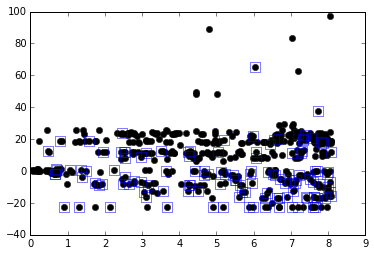

In [7]:
# Loop over clusters and make phase-space diagram for each
clusterswedontlike=['NRGb004','NRGs038',]

for i in range(len(name)):
    cl=cluster(name[i],centerv[i],sigma[i],ra[i],dec[i],r200[i])
    cl.readAGC()
    cl.plotphasespace()

In [26]:
# Read in fits table
infile='NRGb244_AGC.fits'
cdat=fits.getdata(infile)

In [48]:
cl.readAGC()

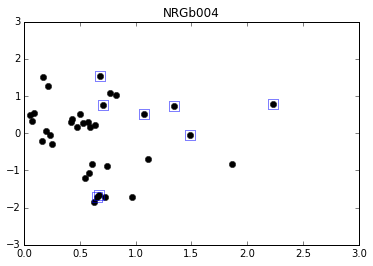

In [49]:
cl.plotphasespace()

# NRGb244

[0, 1, -3, 3]

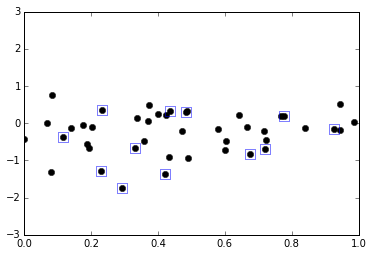

In [6]:
# Measure center velocity and velocity dispersion
# Define the center for the cluster
centerRA=201.04137 # from NED
centerDec=13.97664 # from NED
centerVel=7133.6 # from NED
sigma=518.8 

deltaR = np.sqrt((centerRA-cdat.RA)**2+(centerDec-cdat.DEC)**2)
deltaV = (cdat.VOPT - centerVel)/sigma
HIflag = cdat.FLUX100 > 0
plt.figure()
plt.plot(deltaR/0.600350884411,deltaV,'ko')
plt.plot(deltaR[HIflag]/0.600350884411,deltaV[HIflag],'bs',markersize=10,mec='b',mfc='None')
plt.axis([0,1,-3,3])

# Abell 2063

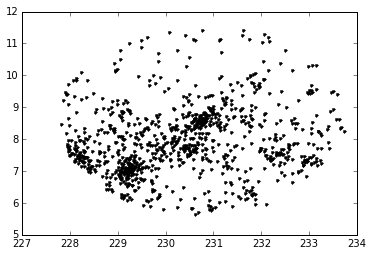

In [7]:
# Read in fits table
infile='Abell2063_AGC.fits'
cdat=fits.getdata(infile)
plt.figure()
plt.plot(cdat.RA,cdat.DEC,'k.')

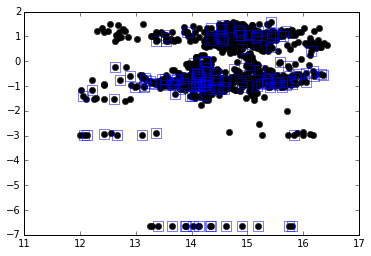

In [9]:
# Define the center for the cluster
centerRA=225.7830 # from NED
centerDec=26.2567 # from NED
centerVel=11640.6 # NEED TO CHANGE BASED ON NEW DATA
sigma=1750.7

deltaR = np.sqrt((centerRA-cdat.RA)**2+(centerDec-cdat.DEC)**2)
deltaV = (cdat.VOPT - centerVel)/sigma
HIflag = cdat.FLUX100 > 0
plt.figure()
plt.clf()
plt.plot(deltaR/1.29385943392,deltaV,'ko')
plt.plot(deltaR[HIflag]/1.29385943392,deltaV[HIflag],'bs',markersize=10,mec='b',mfc='None')
#plt.plot(cdat.RA, cdat.DEC, '.r')
#plt.axis([196,205,-10,20])

In [8]:
# Central velocity, velocity dispersion, color information, substructure, x-ray papers, beta model